# Chronic Kidney(Renal) Disease Prediction Using Machine Learning

# Importing neccesary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

# Data pre-processing

In [3]:
df = pd.read_csv(r'C:\Users\Selva Vignesh M\Desktop\kid.csv', na_values=['?',None])
df['age'].fillna(value=df['age'].mean(), inplace=True)
df['bp'].fillna(value=df['bp'].mean(), inplace=True)
df['sg'].fillna(value=df['sg'].mean(), inplace=True)
df['al'].fillna(value=df['al'].mean(), inplace=True)
df['sugar'].fillna(value=df['sugar'].mode()[0], inplace=True)
df['rbc']= df["rbc"].replace("normal", "1")
df['rbc']= df["rbc"].replace("abnormal", "0")
df['rbc'].fillna(value=df['rbc'].mode()[0], inplace=True)
df['pc']= df["pc"].replace("normal", "1")
df['pc']= df["pc"].replace("abnormal", "0")
df['pc'].fillna(value=df['pc'].mode()[0], inplace=True)
df['pcc']= df["pc"].replace("normal", "1")
df['pcc']= df["pc"].replace("abnormal", "0")
df['pcc'].fillna(value=df['pcc'].mode()[0], inplace=True)
df['ba']= df["ba"].replace("notpresent", "1")
df['ba']= df["ba"].replace("present", "0")
df['ba'].fillna(value=df['ba'].mode()[0], inplace=True)
df['bgr'].fillna(value=df['bgr'].mean(), inplace=True)
df['bu'].fillna(value=df['bu'].mean(), inplace=True)
df['sc'].fillna(value=df['sc'].mean(), inplace=True)
df['sod'].fillna(value=df['sod'].mean(), inplace=True)
df['pot'].fillna(value=df['pot'].mean(), inplace=True)
df['hemo'].fillna(value=df['hemo'].mean(), inplace=True)
df['pvc'].fillna(value=df['pvc'].mean(), inplace=True)
df['wc'].fillna(value=df['wc'].mean(), inplace=True)
df['rv'].fillna(value=df['rv'].mean(), inplace=True)
df['htn']= df["htn"].replace("no", "1")
df['htn']= df["htn"].replace("yes", "0")
df['htn'].fillna(value=df['htn'].mode()[0], inplace=True)
df['dm']= df["dm"].replace("yes", "0")
df['dm']= df["dm"].replace(" yes", "0")
df['dm']= df["dm"].replace("no", "1")
df['dm'].fillna(value=df['dm'].mode()[0], inplace=True)
df['cad']= df["cad"].replace("yes", "0")
df['cad']= df["cad"].replace("no", "1")
df['cad'].fillna(value=df['cad'].mode()[0], inplace=True)
df['appet']= df["appet"].replace("no", "0")
df['appet']= df["appet"].replace("poor", "1")
df['appet']= df["appet"].replace("good", "2")
df['appet'].fillna(value=df['appet'].mode()[0], inplace=True)
df['pe']= df["pe"].replace("good", "0")
df['pe']= df["pe"].replace("yes", "1")
df['pe']= df["pe"].replace("no", "2")
df['pe'].fillna(value=df['pe'].mode()[0], inplace=True)
df['ane']= df["ane"].replace("yes", "0")
df['ane']= df["ane"].replace("no", "1")
df['ane'].fillna(value=df['ane'].mode()[0], inplace=True)
df['class']= df["class"].replace("notckd", "0")
df['class']= df["class"].replace("ckd", "1")
df.head(25)

,age,bp,sg,al,sugar,rbc,pc,pcc,ba,bgr,...,pvc,wc,rv,htn,dm,cad,appet,pe,ane,class
0,48.0,80.000000,1.020000,1.000000,0.0,1,1,1,1,121.000000,...,44.000000,7800.000000,5.200000,0,0,1,2,2,1,1
1,7.0,50.000000,1.020000,4.000000,0.0,1,1,1,1,148.036517,...,38.000000,6000.000000,77.134201,1,1,1,2,2,1,1
2,62.0,80.000000,1.010000,2.000000,3.0,1,1,1,1,423.000000,...,31.000000,7500.000000,77.134201,1,0,1,1,2,0,1
3,48.0,70.000000,1.005000,4.000000,0.0,1,0,0,1,117.000000,...,32.000000,6700.000000,3.900000,0,1,1,1,1,0,1
4,51.0,80.000000,1.010000,2.000000,0.0,1,1,1,1,106.000000,...,35.000000,7300.000000,4.600000,1,1,1,2,2,1,1
5,60.0,90.000000,1.015000,3.000000,0.0,1,1,1,1,74.000000,...,39.000000,7800.000000,4.400000,0,0,1,2,1,1,1
6,68.0,70.000000,1.010000,0.000000,0.0,1,1,1,1,100.000000,...,36.000000,8397.065068,77.134201,1,1,1,2,2,1,1
7,24.0,76.469072,1.015000,2.000000,4.0,1,0,0,1,410.000000,...,44.000000,6900.000000,5.000000,1,0,1,2,1,1,1
8,52.0,100.000000,1.015000,3.000000,0.0,1,0,0,1,138.000000,...,33.000000,9600.000000,4.000000,0,0,1,2,2,0,1
9,53.0,90.000000,1.020000,2.000000,0.0,0,0,0,1,70.000000,...,29.000000,12100.000000,3.700000,0,0,1,1,2,0,1


# Exploratory Data Analysis

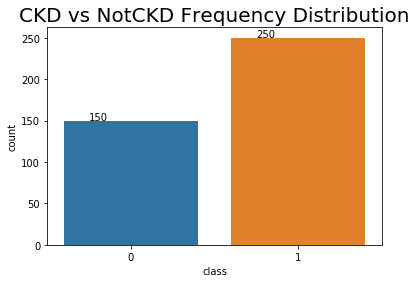

In [4]:
ax = sns.countplot(data = df, x ='class')
ax.set_title('CKD vs NotCKD Frequency Distribution', fontsize=20)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

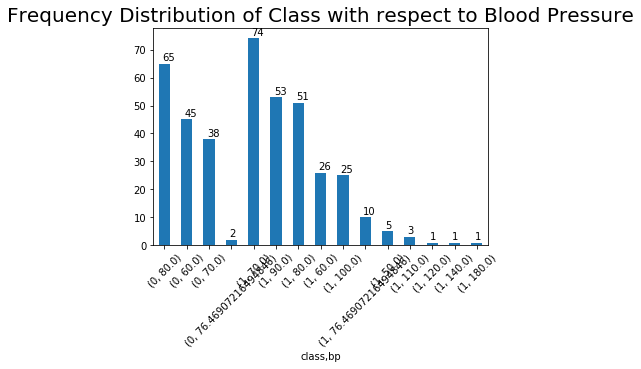

In [6]:
ax = df['bp'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Blood Pressure', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

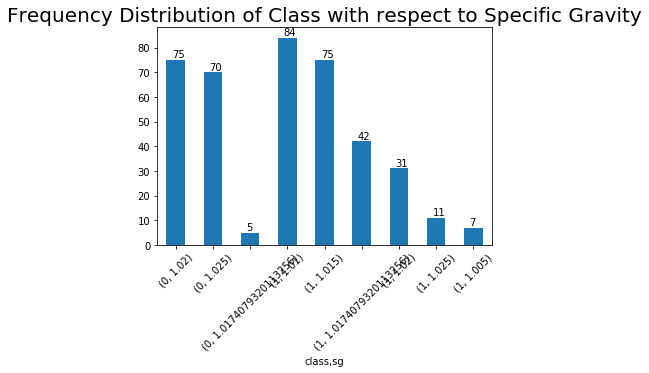

In [7]:
ax = df['sg'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Specific Gravity', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

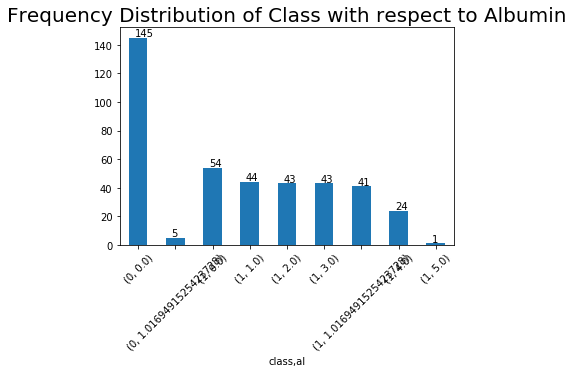

In [8]:
ax = df['al'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Albumin', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

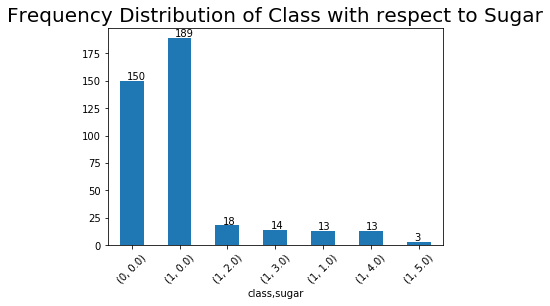

In [9]:
ax = df['sugar'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Sugar', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

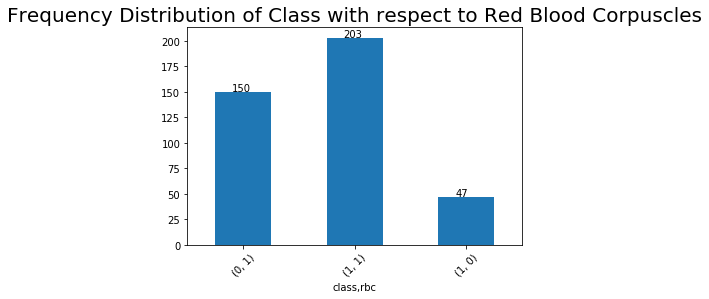

In [10]:
ax = df['rbc'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Red Blood Corpuscles', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

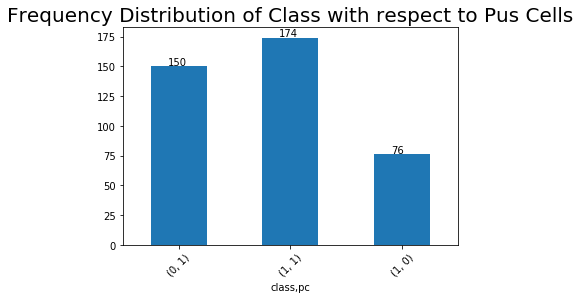

In [11]:
ax = df['pc'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Pus Cells', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

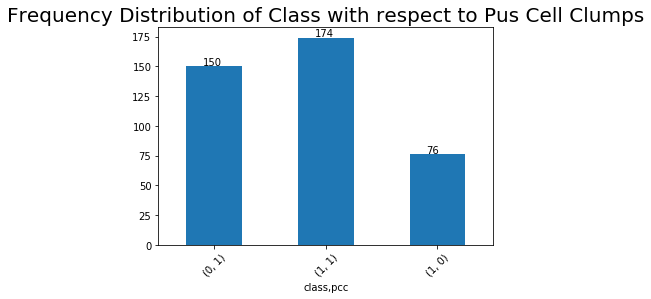

In [12]:
ax = df['pcc'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Pus Cell Clumps', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

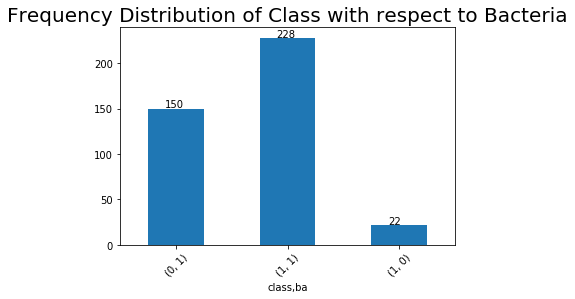

In [13]:
ax = df['ba'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Bacteria', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

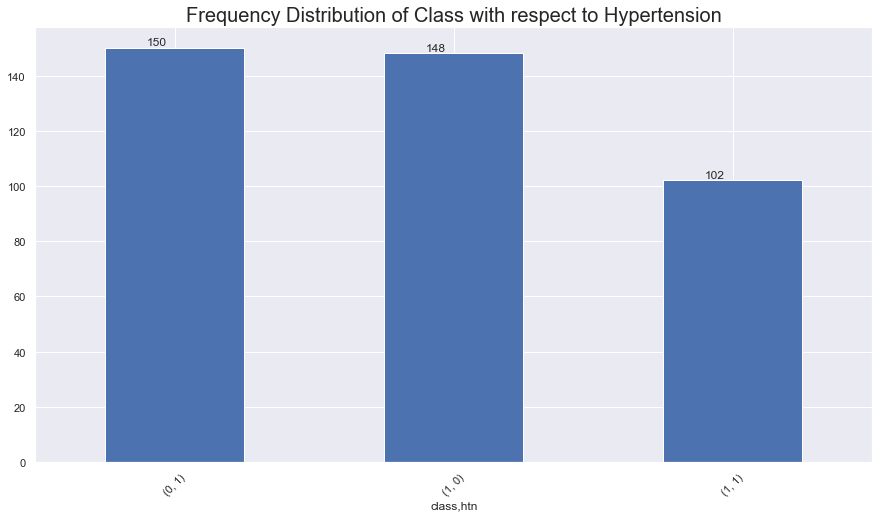

In [369]:
ax = df['htn'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Hypertension', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

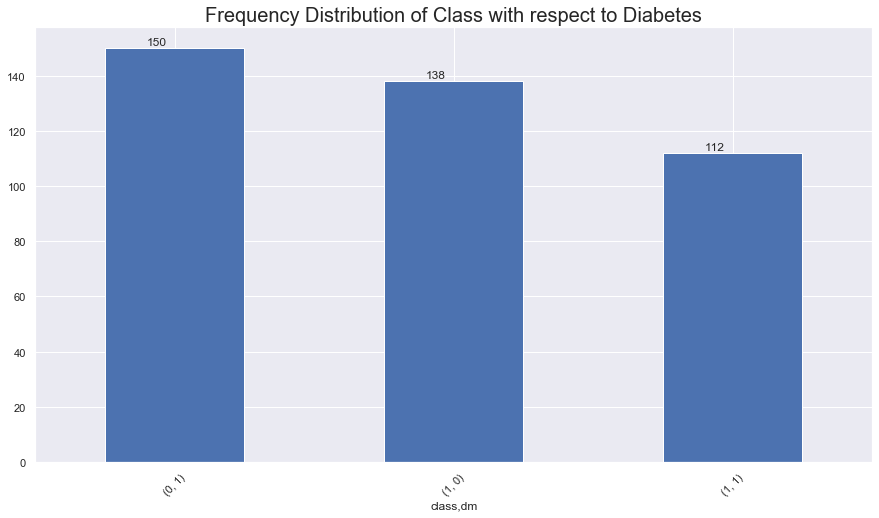

In [370]:
ax = df['dm'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Diabetes', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

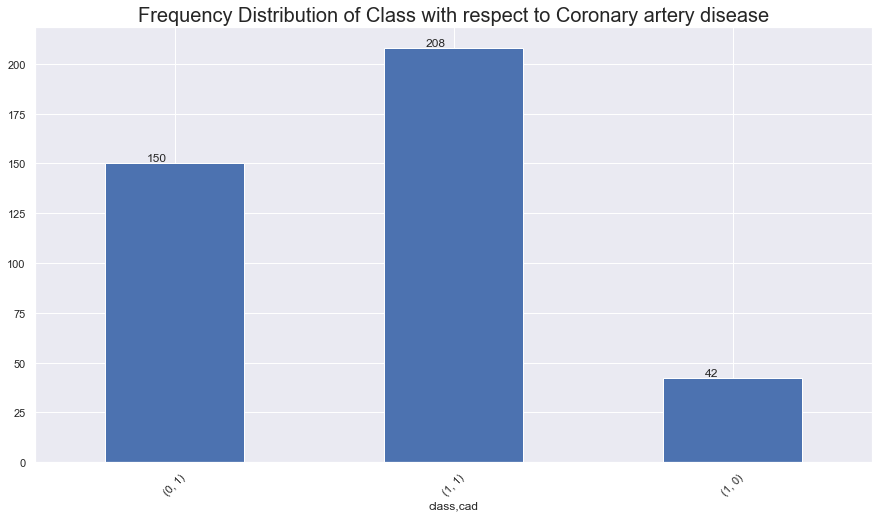

In [371]:
ax = df['cad'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Coronary artery disease', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

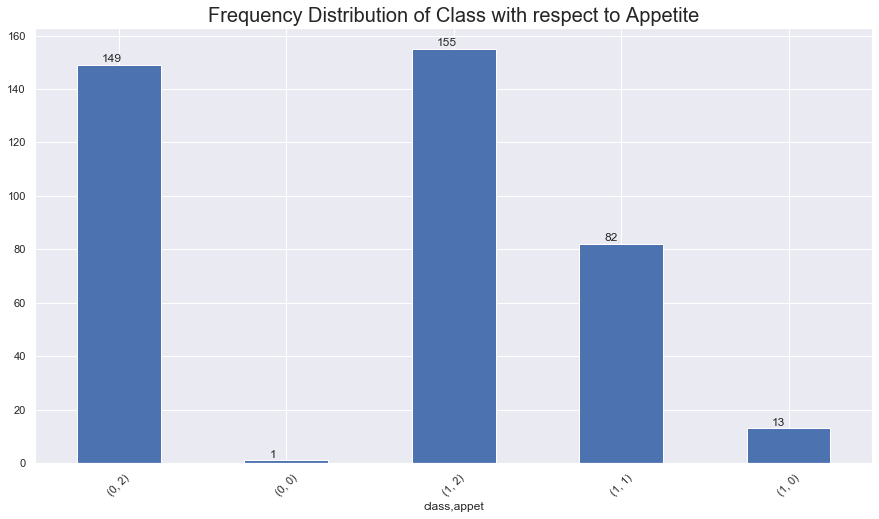

In [372]:
ax = df['appet'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Appetite', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

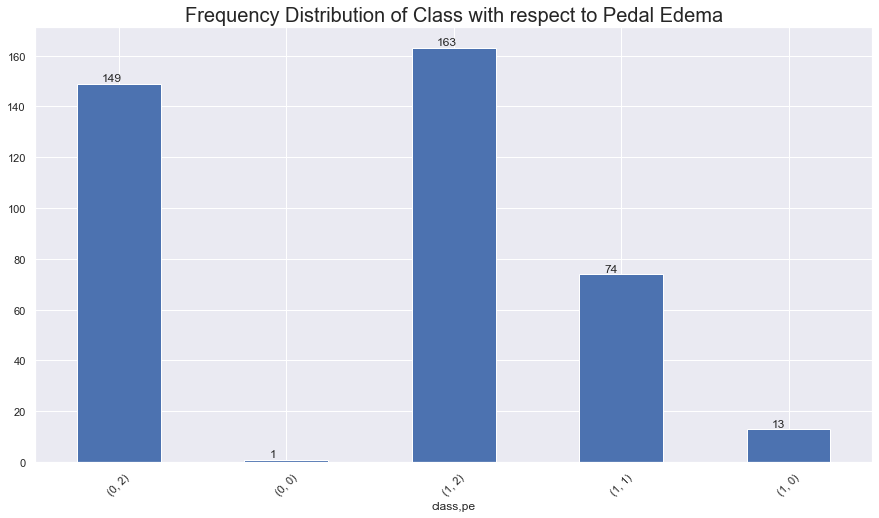

In [373]:
ax = df['pe'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Pedal Edema', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

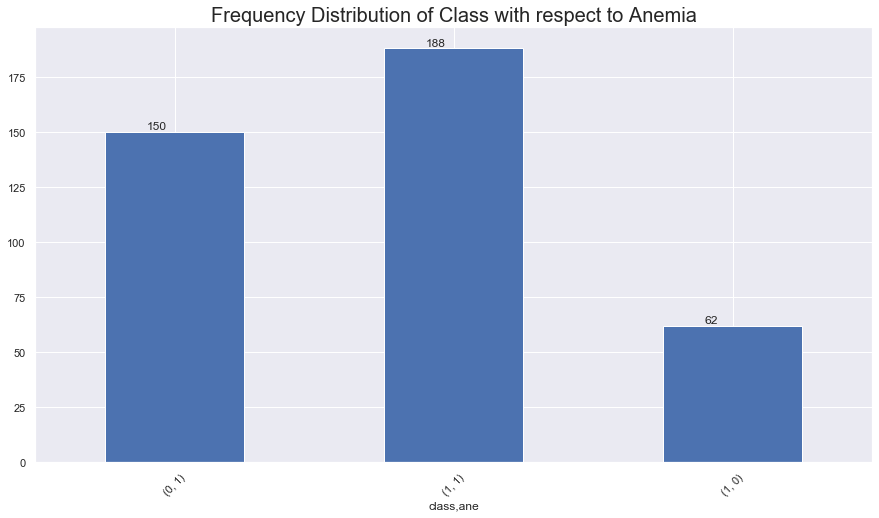

In [403]:
ax = df['ane'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Anemia', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

# Understanding the Prime variables

In [285]:
df['bp'].value_counts()

80.000000     116
70.000000     112
60.000000      71
90.000000      53
100.000000     25
76.469072      12
50.000000       5
110.000000      3
120.000000      1
180.000000      1
140.000000      1
Name: bp, dtype: int64

In [286]:
df['sg'].value_counts()

1.020000    106
1.010000     84
1.025000     81
1.015000     75
1.017408     47
1.005000      7
Name: sg, dtype: int64

In [287]:
df['al'].value_counts()

0.000000    199
1.016949     46
1.000000     44
3.000000     43
2.000000     43
4.000000     24
5.000000      1
Name: al, dtype: int64

In [288]:
df['sugar'].value_counts()

0.0    339
2.0     18
3.0     14
1.0     13
4.0     13
5.0      3
Name: sugar, dtype: int64

In [289]:
df['rbc'].value_counts()

1    353
0     47
Name: rbc, dtype: int64

In [290]:
df['pc'].value_counts()

1    324
0     76
Name: pc, dtype: int64

In [291]:
df['pcc'].value_counts()

1    324
0     76
Name: pcc, dtype: int64

In [292]:
df['ba'].value_counts()

1    378
0     22
Name: ba, dtype: int64

In [302]:
df['htn'].value_counts()

1    252
0    148
Name: htn, dtype: int64

In [303]:
df['dm'].value_counts()

1    262
0    138
Name: dm, dtype: int64

In [304]:
df['cad'].value_counts()

1    358
0     42
Name: cad, dtype: int64

In [305]:
df['appet'].value_counts()

2    304
1     82
0     14
Name: appet, dtype: int64

In [306]:
df['pe'].value_counts()

2    312
1     74
0     14
Name: pe, dtype: int64

In [307]:
df['ane'].value_counts()

1    338
0     62
Name: ane, dtype: int64

In [308]:
df['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [309]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
sugar    0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pvc      0
wc       0
rv       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

# Selection of significant variables

         chi2 val   pval
age     10.081123  0.001
bp      10.354704  0.001
sg     172.856584  0.000
al     265.487303  0.000
sugar   70.908849  0.000
rbc     30.013251  0.000
pc      84.654282  0.000
pcc     84.654282  0.000
ba       6.186849  0.013
bgr     38.829286  0.000
bu      31.245587  0.000
sc      11.707475  0.001
sod      1.492822  0.222
pot      0.536857  0.464
hemo    86.750065  0.000
pvc     72.642785  0.000
wc       3.156348  0.076
rv       1.193880  0.275
htn    399.000900  0.000
dm     335.583176  0.000
cad     23.669354  0.000
appet   37.975635  0.000
pe      32.062977  0.000
ane     54.276119  0.000


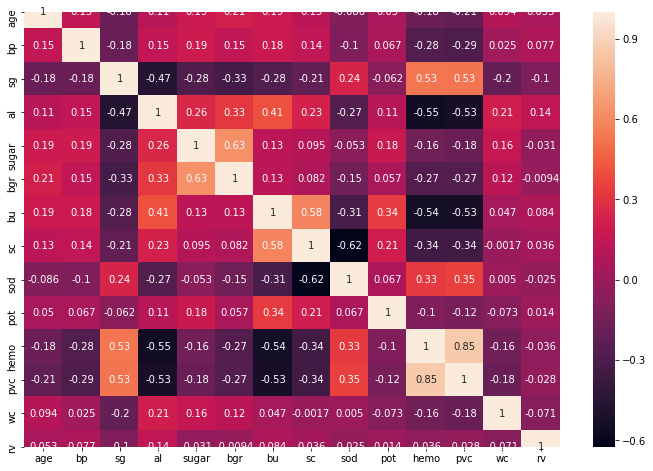

In [14]:
fig,axes = plt.subplots(figsize=(12,8))
correl = df.corr()
sns.heatmap(df.corr(),annot=True,ax=axes)
x = df.drop(columns=['class']).values
y = df['class'].values
from sklearn.preprocessing import MinMaxScaler
minmaxer = MinMaxScaler(feature_range=(1,10))
minmaxed_x = minmaxer.fit_transform(x)
from sklearn.feature_selection import chi2
chi_value,pval = chi2(minmaxed_x,y)
pval = np.round(pval,decimals=3)
with np.printoptions(precision=4,suppress=True):
 print(pd.DataFrame(np.concatenate((chi_value.reshape(-1,1),pval.reshape(-1,1)),axis=1),
 index = df.columns[:-1],columns=['chi2 val','pval']))

# Splitting dataset into training and test data

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['rv','sod','pot']).values
Y = df['class'].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,stratify = y, shuffle = True)

# Model Optimization - K fold cross validation

In [311]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics as met
scores = []
models = []

# utility function to print cross k-fold cross validation scores, their mean and variance(standard deviation)
def print_scores(model, X_train, Y_train, cv, scoring):
    print('Cross validation scores:', cross_val_score(model, X_train, Y_train, cv=cv, scoring=scoring, n_jobs=-1) )
    print( 'Mean of scores:', np.mean( cross_val_score(model, X_train, Y_train, cv=cv, scoring=scoring, n_jobs=-1) ) )
    print( 'Variance:', np.std( cross_val_score(model, X_train, Y_train, cv=cv, scoring=scoring, n_jobs=-1) ) )

# Fitting the Models

# Logistic Regression

In [418]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()
print_scores(logreg, X_train, Y_train, 10, 'accuracy')

logreg.fit(X_train,Y_train)
Y_pred_lr = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
print('Classification Report', classification_report(Y_test, Y_pred_lr))
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred_lr))
print("Training Accuracy", logreg.score(X_train, Y_train)*100)
print("Testing Accuracy", logreg.score(X_test, Y_test)*100)

from sklearn.metrics import accuracy_score 
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression Model is: "+str(score_lr)+" %")

Cross validation scores: [0.96551724 1.         1.         1.         1.         1.
 1.         0.92592593 1.         0.96296296]
Mean of scores: 0.9854406130268201
Variance: 0.024347512633036986
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        75

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Confusion Matrix [[45  0]
 [ 0 75]]
Training Accuracy 99.28571428571429
Testing Accuracy 100.0
The accuracy score achieved using Logistic Regression Model is: 100.0 %


# Naive Bayes Classification

In [384]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
print_scores(nb, X_train, Y_train, 10, 'accuracy')

nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

print('Classification Report', classification_report(Y_test, Y_pred_nb))
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred_nb))
print("Training Accuracy", nb.score(X_train, Y_train)*100)
print("Testing Accuracy", nb.score(X_test, Y_test)*100)

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes Model is: "+str(score_nb)+" %")

Cross validation scores: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.96296296]
Mean of scores: 0.9962962962962963
Variance: 0.011111111111111127
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        75

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Confusion Matrix [[45  0]
 [ 0 75]]
Training Accuracy 100.0
Testing Accuracy 100.0
The accuracy score achieved using Naive Bayes Model is: 100.0 %


# Support Vector Classifer

In [386]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
print_scores(sv, X_train, Y_train, 10, 'accuracy')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)

print('Classification Report', classification_report(Y_test, Y_pred_svm))
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred_svm))
print("Training Accuracy", sv.score(X_train, Y_train)*100)
print("Testing Accuracy", sv.score(X_test, Y_test)*100)

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM Model is: "+str(score_svm)+" %")

Cross validation scores: [0.96551724 1.         0.96551724 1.         1.         1.
 0.96296296 0.96296296 0.96296296 0.96296296]
Mean of scores: 0.9782886334610474
Variance: 0.017751775585076953
Classification Report               precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.97      1.00      0.99        75

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

Confusion Matrix [[43  2]
 [ 0 75]]
Training Accuracy 98.21428571428571
Testing Accuracy 98.33333333333333
The accuracy score achieved using Linear SVM Model is: 98.33 %


In [387]:
sv1 = svm.SVC(kernel='rbf')
print_scores(sv1, X_train, Y_train, 10, 'accuracy')
sv1.fit(X_train, Y_train)
Y_pred_svm1 = sv1.predict(X_test)

print('Classification Report', classification_report(Y_test, Y_pred_svm1))
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred_svm1))
print("Training Accuracy", sv1.score(X_train, Y_train)*100)
print("Testing Accuracy", sv1.score(X_test, Y_test)*100)

score_svm1 = round(accuracy_score(Y_pred_svm1,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM Model is: "+str(score_svm1)+" %")

Cross validation scores: [0.62068966 0.62068966 0.62068966 0.62068966 0.62068966 0.62962963
 0.62962963 0.62962963 0.62962963 0.62962963]
Mean of scores: 0.6251596424010218
Variance: 0.004469987228607919
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.62      1.00      0.77        75

    accuracy                           0.62       120
   macro avg       0.31      0.50      0.38       120
weighted avg       0.39      0.62      0.48       120

Confusion Matrix [[ 0 45]
 [ 0 75]]
Training Accuracy 100.0
Testing Accuracy 62.5
The accuracy score achieved using Linear SVM Model is: 62.5 %


# KNN Classifier

Cross validation scores: [0.82758621 0.86206897 0.72413793 0.68965517 0.79310345 0.77777778
 0.62962963 0.55555556 0.62962963 0.74074074]
Mean of scores: 0.7229885057471265
Variance: 0.092247032102738
Classification Report               precision    recall  f1-score   support

           0       0.70      0.84      0.77        45
           1       0.89      0.79      0.84        75

    accuracy                           0.81       120
   macro avg       0.80      0.82      0.80       120
weighted avg       0.82      0.81      0.81       120

Confusion Matrix [[38  7]
 [16 59]]
Training Accuracy 89.64285714285715
Testing Accuracy 80.83333333333333
The accuracy score achieved using KNN Model is: 80.83 %


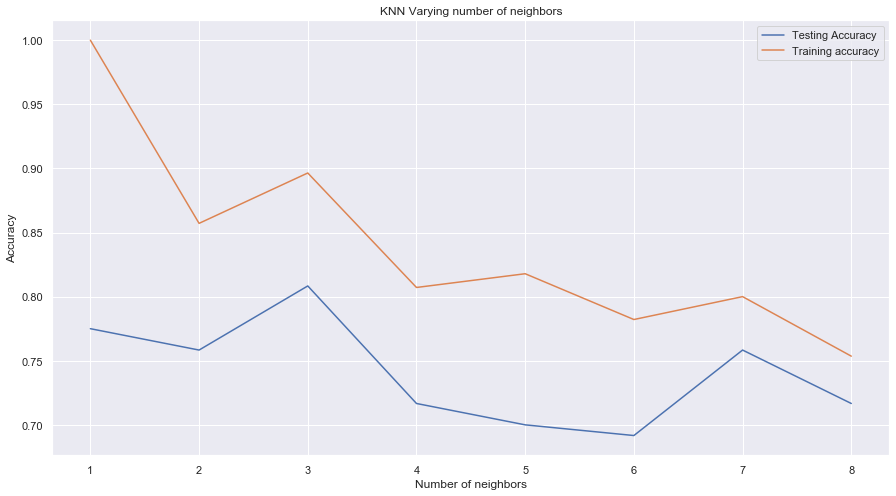

In [420]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test)
print_scores(knn, X_train, Y_train, 10, 'accuracy')
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)

print('Classification Report', classification_report(Y_test, Y_pred_knn))
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred_knn))
print("Training Accuracy", knn.score(X_train, Y_train)*100)
print("Testing Accuracy", knn.score(X_test, Y_test)*100)

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN Model is: "+str(score_knn)+" %")

plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# Decision Tree Classifier

In [421]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=best_x)
print_scores(dt, X_train, Y_train, 10, 'accuracy')

dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

print('Classification Report', classification_report(Y_test, Y_pred_dt))
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred_dt))
print("Training Accuracy", dt.score(X_train, Y_train)*100)
print("Testing Accuracy", dt.score(X_test, Y_test)*100)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree Model is: "+str(score_dt)+" %")

Cross validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of scores: 1.0
Variance: 0.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        75

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Confusion Matrix [[45  0]
 [ 0 75]]
Training Accuracy 100.0
Testing Accuracy 100.0
The accuracy score achieved using Decision Tree Model is: 100.0 %


# Random Forest

In [390]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state= 0)
print_scores(gnb, X_train, Y_train, 10, 'accuracy')

rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

print('Classification Report', classification_report(Y_test, Y_pred_rf))
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred_rf))
print("Training Accuracy", rf.score(X_train, Y_train)*100)
print("Testing Accuracy", rf.score(X_test, Y_test)*100)

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy score achieved using Random Forest Model is: "+str(score_rf)+" %")

Cross validation scores: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.96296296]
Mean of scores: 0.9962962962962963
Variance: 0.011111111111111127
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        75

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Confusion Matrix [[45  0]
 [ 0 75]]
Training Accuracy 100.0
Testing Accuracy 100.0
The accuracy score achieved using Random Forest Model is: 100.0 %


# Models and their respective Scores

In [391]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 100.0 %
The accuracy score achieved using Naive Bayes is: 100.0 %
The accuracy score achieved using Support Vector Machine is: 98.33 %
The accuracy score achieved using K-Nearest Neighbors is: 80.83 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %


# Model comparison and its visualization

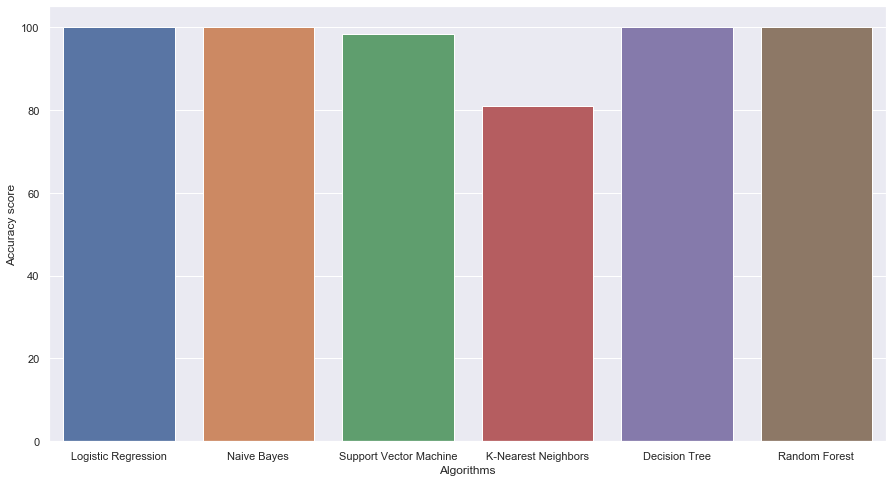

In [392]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)